In [1]:
import sys
import os

# add project root to path
root = os.path.abspath("..")   # one level up from notebooks/
sys.path.append(root)

In [2]:
import numpy as np
import pandas as pd

from src.calibration import calibrate_gbm, calibrate_ou, calibrate_heston, calibrate_merton
from src.models import GBMParams, OUParams, HestonParams, MertonParams
from src.simulation import simulate_gbm, simulate_ou, simulate_heston, simulate_merton
from src.analysis import plot_real_vs_simulated

In [3]:
# load price data
df = pd.read_csv("../data/SPY.csv", thousands=",")
# print(df.columns)
prices = df["Price"].to_numpy(dtype=float)
print(type(prices))

dt = 1.0 / 252

<class 'numpy.ndarray'>


In [4]:
# calibrate GBM parameters
mu_gbm, sigma_gbm = calibrate_gbm(prices, dt)
print("GBM parameters:")
print(f"   mu = {mu_gbm:.5f}")
print(f"   sigma = {sigma_gbm:.5f}")

GBM parameters:
   mu = -0.12304
   sigma = 0.17112


In [5]:
# calibrate OU parameters
logp = np.log(prices)
theta_ou, mu_ou, sigma_ou = calibrate_ou(logp, dt)
print("OU parameters:")
print(f"   theta = {theta_ou:.5f}")
print(f"   mu = {mu_ou:.5f}")
print(f"   sigma = {sigma_ou:.5f}")

OU parameters:
   theta = 0.65315
   mu = 8.22954
   sigma = 0.17098


In [6]:
# calibrate Heston parameters
kappa_heston, theta_heston, xi_heston, rho_heston, v0 = calibrate_heston(prices, dt)
print("Heston parameters:")
print(f"   kappa = {kappa_heston:.5f}")
print(f"   theta = {theta_heston:.5f}")
print(f"   xi = {xi_heston:.5f}")
print(f"   rho = {rho_heston:.5f}")
print(f"   v0 = {v0:.5f}")

Heston parameters:
   kappa = 27.26256
   theta = 0.02958
   xi = 0.34636
   rho = -0.04264
   v0 = 0.04891


In [7]:
# calibrate Merton parameters
mu_merton, sigma_merton, lambda_j, mu_j, sigma_j= calibrate_merton(prices, dt)
print("Merton parameters:")
print(f"   mu = {mu_merton:.5f}")
print(f"   sigma = {sigma_merton:.5f}")
print(f"   lambda_j = {lambda_j:.5f}")
print(f"   mu_j = {mu_j:.5f}")
print(f"   sigma_j = {sigma_j:.5f}")

Merton parameters:
   mu = -0.13768
   sigma = 0.16657
   lambda_j = 0.61533
   mu_j = 0.00000
   sigma_j = 0.05000


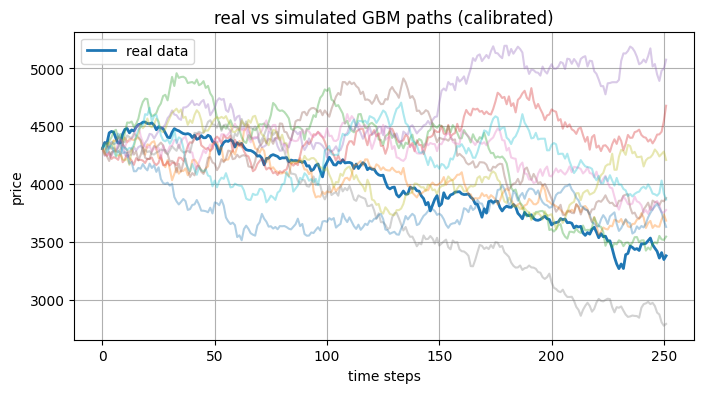

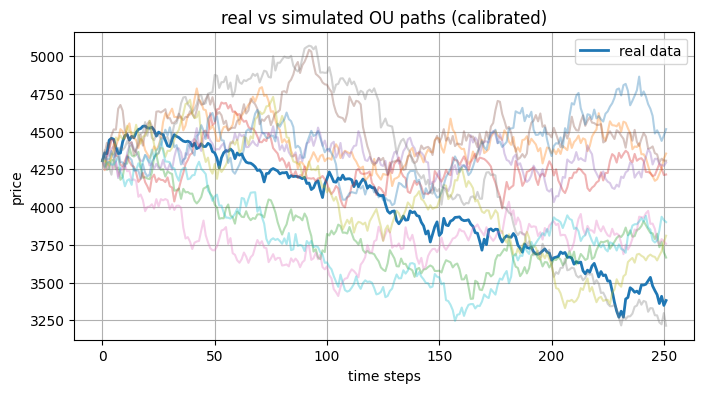

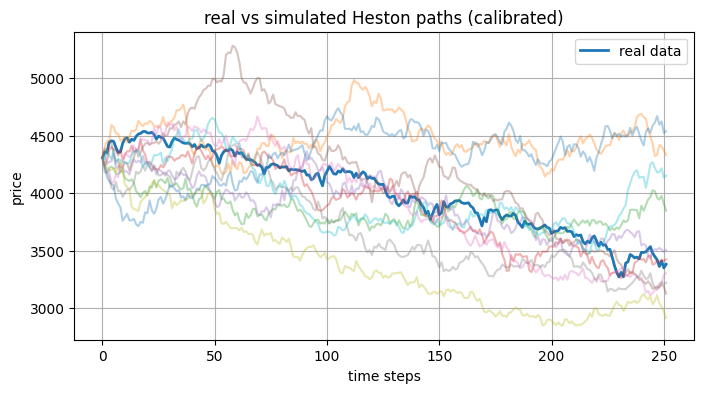

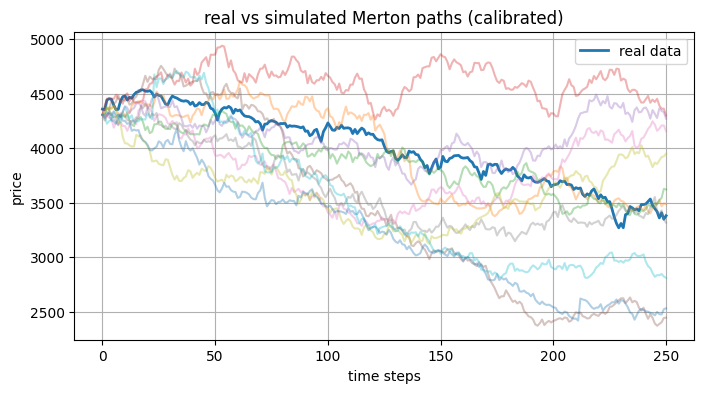

In [8]:
""" compare simulated data with real data"""

N = 252 # simulation length (1 year)
real = prices[-N:]
S0 = real[0]
X0 = np.log(real[0])
T  = (N - 1) * dt
n_paths = 50

gbm_params    = GBMParams(mu=mu_gbm, sigma=sigma_gbm, S0=S0, T=T, dt=dt, n_paths=n_paths)
ou_params     = OUParams(theta=theta_ou, mu=mu_ou, sigma=sigma_ou, X0=X0, T=T, dt=dt, n_paths=n_paths)
heston_params = HestonParams(mu=mu_gbm, kappa=kappa_heston, theta=theta_heston, xi=xi_heston, rho=rho_heston, v0=v0, S0=S0, T=T, dt=dt, n_paths=n_paths)
merton_params = MertonParams(mu=mu_merton, sigma=sigma_merton, lambda_j=lambda_j, mu_j=mu_j, sigma_j=sigma_j, S0=S0, T=T, dt=dt, n_paths=n_paths)


t, S_gbm       = simulate_gbm(gbm_params)
t, X_ou        = simulate_ou(ou_params)
t, S_heston, v = simulate_heston(heston_params)
t, S_merton    = simulate_merton(merton_params)

S_ou = np.exp(X_ou)

plot_real_vs_simulated(prices, S_gbm,    "GBM",    window=N, align="start", save_path="../plots/real_vs_gbm_paths.png")
plot_real_vs_simulated(prices, S_ou,     "OU",     window=N, align="start", save_path="../plots/real_vs_ou_paths.png")
plot_real_vs_simulated(prices, S_heston, "Heston", window=N, align="start", save_path="../plots/real_vs_heston_paths.png")
plot_real_vs_simulated(prices, S_merton, "Merton", window=N, align="start", save_path="../plots/real_vs_merton_paths.png")